In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset = pd.read_csv('/Users/pawankumarkc/Documents/vscode_workspace/MLAlgo/datasets/ReviewRatings.csv')
dataset.head()

,User,Churches,Resorts,Beaches,Parks,Theatres,Museums,Malls,Zoo,Restaurants,...,Art Galleries,Dance Clubs,Swimming Pools,Gyms,Bakeries,Spas,Cafes,View Points,Monuments,Gardens
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [3]:
dataset.isnull().sum()

User              0
Churches          0
Resorts           0
Beaches           0
Parks             0
Theatres          0
Museums           0
Malls             0
Zoo               0
Restaurants       0
Bars              0
Local Services    0
Fast Food         0
Lodgings          0
Juice Bars        0
Art Galleries     0
Dance Clubs       0
Swimming Pools    0
Gyms              0
Bakeries          0
Spas              0
Cafes             0
View Points       0
Monuments         0
Gardens           0
dtype: int64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User            5456 non-null   object 
 1   Churches        5456 non-null   float64
 2   Resorts         5456 non-null   float64
 3   Beaches         5456 non-null   float64
 4   Parks           5456 non-null   float64
 5   Theatres        5456 non-null   float64
 6   Museums         5456 non-null   float64
 7   Malls           5456 non-null   float64
 8   Zoo             5456 non-null   float64
 9   Restaurants     5456 non-null   float64
 10  Bars            5456 non-null   float64
 11  Local Services  5456 non-null   float64
 12  Fast Food       5456 non-null   float64
 13  Lodgings        5456 non-null   float64
 14  Juice Bars      5456 non-null   float64
 15  Art Galleries   5456 non-null   float64
 16  Dance Clubs     5456 non-null   float64
 17  Swimming Pools  5456 non-null   f

In [10]:
x = dataset.drop(columns=['User'])

In [11]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc_x = sc.fit_transform(x)
sc_x

array([[-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       [-1.75911777, -1.6320937 ,  0.91421654, ..., -1.09505221,
        -1.16303953, -1.33211789],
       ...,
       [-0.6232054 ,  1.88579429,  1.23480615, ...,  2.03270857,
         2.63413607, -0.38466551],
       [-0.61112123,  1.21739557,  1.25083563, ...,  2.03270857,
         2.63413607, -0.37612991],
       [-0.61112123,  1.23146712,  2.01223593, ...,  2.03270857,
         2.63413607, -0.33345187]])

In [17]:
# Elbow method

from sklearn.cluster import KMeans

wcss=[]

for i in range(1, 10):
    km = KMeans(n_clusters=i, random_state=101)
    km.fit(sc_x)
    wcss.append(km.inertia_)

wcss

[130943.99999999997,
 112267.39268999005,
 99754.77721476898,
 92075.31103168015,
 87491.7231268278,
 83108.18750036719,
 79747.55330486159,
 76866.39628750413,
 74510.83860648928]

In [18]:
len(wcss)

9

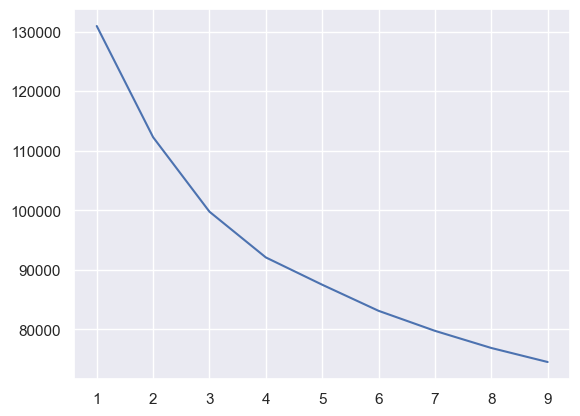

In [19]:
plt.plot([i for i in range(1,10)], wcss)